# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [57]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [72]:
q = app_train['CNT_CHILDREN'].max()
p = app_train['CNT_CHILDREN'].min()
print(q,p)

19 0


In [112]:
#1
cut_rule = [0,0.9999,2,5,19]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True,labels =["0","1-2","3-5",">5"])
app_train['CNT_CHILDREN_GROUP'].value_counts()


0      215371
1-2     87868
3-5      4230
>5         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [96]:
#2-1_TARGET
grouped_df_TARGET = app_train.groupby(app_train['TARGET'])['AMT_INCOME_TOTAL']
grouped_df_TARGET.mean()

TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64

In [92]:
grp

[0, 0.9999, 2, 5, 19]

In [98]:
#2-1 CNT_CHILDREN_GROUP
"""
Your code here
"""
grp = app_train['CNT_CHILDREN_GROUP']

grouped_df_CNT_CHILDREN_GROUP = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df_CNT_CHILDREN_GROUP.mean()

CNT_CHILDREN_GROUP
0      166288.713566
1-2    174725.712648
3-5    173626.303191
超過5    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

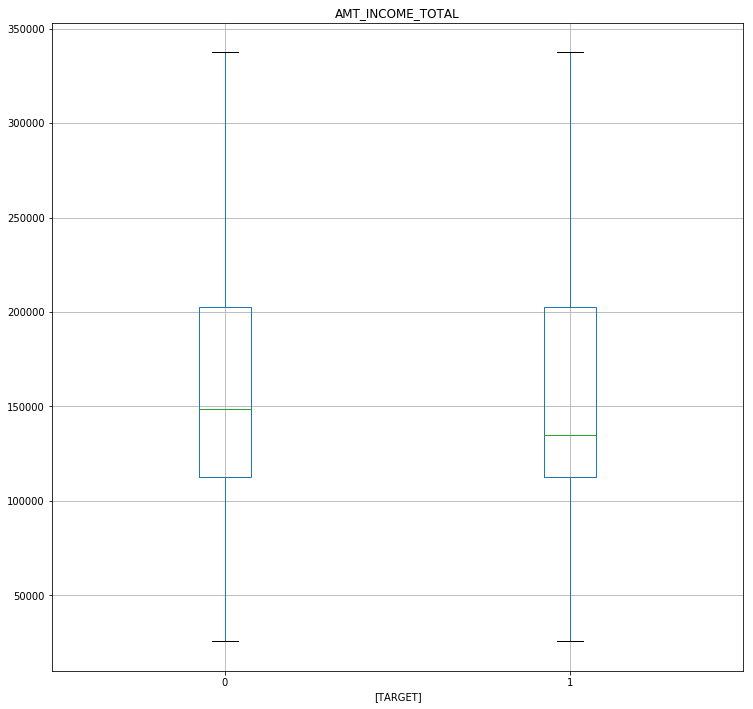

In [110]:
#2-2 TARGET_boxplot

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['TARGET']

app_train.boxplot(plt_column,plt_by,showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

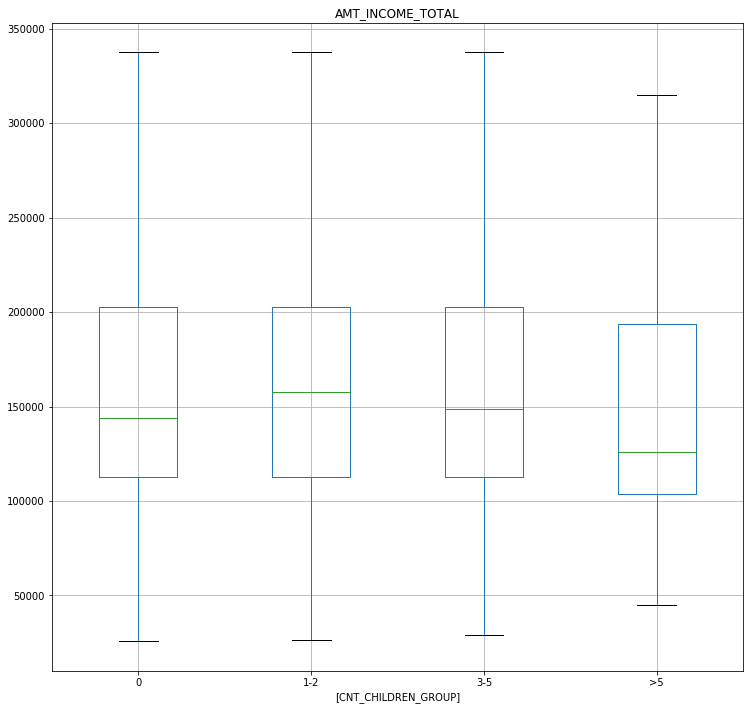

In [145]:
#2-2 CNT_CHILDREN_GROUP_boxplot

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP']

app_train.boxplot(plt_column,plt_by,showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [144]:
#3
app_train.groupby(['AMT_INCOME_TOTAL'])['AMT_INCOME_TOTAL'].mean()
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:x/ ((x-x.mean())/x.std()))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,4.098924e+06
1,270000.0,2.955600e+05
2,67500.0,-7.341322e+04
3,135000.0,-4.376553e+05
4,121500.0,-2.821250e+05


In [149]:
CCG_mn  = pd.DataFrame(app_train.groupby(CNT_CHILDREN_GROUP)['AMT_INCOME_TOTAL'].mean())

NameError: name 'CNT_CHILDREN_GROUP' is not defined

In [153]:
app_train.loc[0:307510, ['AMT_INCOME_TOTAL']].groupby(['TARGET']).apply(lambda x:x/ ((x-x.mean())/x.std()))

KeyError: 'TARGET'

In [154]:
app_train.loc[0:307510, ['AMT_INCOME_TOTAL']].groupby(['TARGET']).apply(lambda x: x / x.mean())

KeyError: 'TARGET'

In [147]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,4.098924e+06
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.955600e+05
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-7.341322e+04
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-4.376553e+05
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,-2.821250e+05
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0,-1.560717e+05
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0.0,0.0,0.0,1.0,1.0,2.0,1-2,9.827634e+06
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.083123e+05
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,-2.196727e+05
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,-4.376553e+05
